- Name:Smruti Sonekar
- UID:2021700064
- Branch:CSE DS (D)
- Expno:10(Implementing  of ML algorithm based on technical paper:Support Vector Machine Algorithm)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Support Vector Machine Algorithm
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:

*Types of SVM*
SVM can be of two types:*

* Linear SVM: Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.
* Non-linear SVM: Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.*

In [ ]:
diabetics=pd.read_csv("./files/diabetes2.csv")
df=pd.DataFrame(pd.read_csv("./files/diabetes2.csv"))
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
491,2,89,90,30,0,33.5,0.292,42,0
674,8,91,82,0,0,35.6,0.587,68,0
437,5,147,75,0,0,29.9,0.434,28,0
386,5,116,74,29,0,32.3,0.660,35,1
251,2,129,84,0,0,28.0,0.284,27,0


In [ ]:
df.shape

(768, 9)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Support Vector Machines (SVMs) can use various types of kernel functions to map data into higher-dimensional spaces where it can be linearly separated. These kernel functions enable SVMs to handle nonlinear classification tasks effectively. Some commonly used kernel functions in SVM are:

* Linear Kernel: The linear kernel is the simplest kernel and is used when the data is linearly separable in the original feature space. It computes the dot product between the feature vectors directly.
* Polynomial Kernel: The polynomial kernel allows SVM to separate data using polynomial decision boundaries. It computes the dot product raised to a specified power, which controls the degree of the polynomial.
* Radial Basis Function (RBF) Kernel: The RBF kernel is one of the most widely used kernels. It maps data into an infinite-dimensional space using a Gaussian-like function centered at each data point. This kernel is particularly effective for handling nonlinear relationships in the data.
* Sigmoid Kernel: The sigmoid kernel is based on the hyperbolic tangent function and can be used to separate data nonlinearly. It is less commonly used compared to the linear, polynomial, and RBF kernels.

Each kernel has its own advantages and is suitable for different types of data and classification tasks. The choice of kernel can significantly impact the performance of the SVM model, so it's essential to experiment with different kernels to find the one that works best for a particular dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape,X_test.shape

((614, 8), (154, 8))

“Support Vector Machine” (SVM) is a supervised learning machine learning algorithm that can be used for both classification or regression challenges. However, it is mostly used in classification problems, such as text classification. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is the number of features you have), with the value of each feature being the value of a particular coordinate.

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)




SVC(kernel='linear', random_state=42)

In [ ]:
# Predict the labels for the test set
y_pred = svm_model.predict(X_test)


In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.head(10)

,Actual,Predicted
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
204,0,0
97,0,0
336,0,1
568,0,1
148,0,1


In [ ]:
correctly_classified = [1 if actual == predicted else 0 for actual, predicted in zip(results['Actual'], results['Predicted'])]

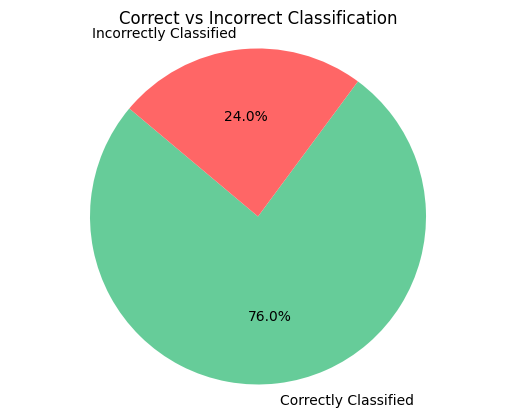

In [ ]:
# Count number of correctly classified instances
num_correct = sum(correctly_classified)

# Count number of incorrectly classified instances (if needed)
num_incorrect = len(correctly_classified) - num_correct

# Create pie chart
labels = ['Correctly Classified', 'Incorrectly Classified']
sizes = [num_correct, num_incorrect]
colors = ['#66CC99', '#FF6666']  # Green for correctly classified, Red for incorrectly classified

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Correct vs Incorrect Classification')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the SVM evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7597402597402597
Precision: 0.6666666666666666
Recall: 0.6545454545454545
F1 Score: 0.6605504587155963
Confusion Matrix:
 [[81 18]
 [19 36]]


In [ ]:
# Make predictions on training and testing data
y_train_pred =svm_model.predict(X_train)
y_test_pred = svm_model.predict(X_test)

In [ ]:
# Calculate accuracy on training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [ ]:
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.7719869706840391
Testing Accuracy: 0.7597402597402597


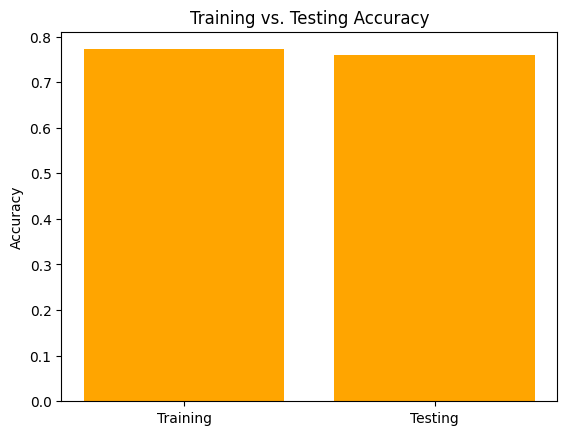

In [ ]:
# Plotting
plt.bar(['Training', 'Testing'], [train_accuracy, test_accuracy],color="orange")
plt.ylabel('Accuracy')
plt.title('Training vs. Testing Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[81 18]
 [19 36]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154




RBF stands for Radial Basis Function, which is a type of kernel function commonly used in Support Vector Machine (SVM) algorithms. In SVM, the kernel function is responsible for computing the dot product between feature vectors in a higher-dimensional space, without explicitly transforming the feature vectors into that space.

The RBF kernel function is defined as:

𝐾
(
𝑥
𝑖
,
𝑥
𝑗
)
=
exp
⁡
(
−
𝛾
∣
∣
𝑥
𝑖
−
𝑥
𝑗
∣
∣
2
)
K(x
i
​
 ,x
j
​
 )=exp(−γ∣∣x
i
​
 −x
j
​
 ∣∣
2
 )

Here:

𝑥
𝑖
x
i
​
  and
𝑥
𝑗
x
j
​
  are feature vectors in the input space.
∣
∣
𝑥
𝑖
−
𝑥
𝑗
∣
∣
2
∣∣x
i
​
 −x
j
​
 ∣∣
2
  represents the squared Euclidean distance between the feature vectors.
𝛾
γ is a hyperparameter that controls the width of the Gaussian kernel. It determines how much influence each training example has on the decision boundary.
The RBF kernel computes the similarity between two feature vectors based on the distance between them. It assigns high similarity (close to 1) to feature vectors that are close to each other in the input space and low similarity (close to 0) to feature vectors that are far apart. This makes it effective for capturing complex nonlinear relationships in the data.

In SVM, the RBF kernel allows the algorithm to find nonlinear decision boundaries by implicitly mapping the input features into a higher-dimensional space where the classes are more easily separable. This makes the RBF kernel one of the most commonly used kernels in SVM, especially when dealing with complex datasets with nonlinear relationships between features and class labels.





In [ ]:
svm_model_rbf = SVC(kernel='rbf', random_state=42)
svm_model_rbf.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_rbf = svm_model_rbf.predict(X_test)

In [ ]:
# Calculate evaluation metrics
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
precision_rbf = precision_score(y_test, y_pred_rbf)
recall_rbf = recall_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

# Print the evaluation metrics for the SVM model with RBF kernel
print("Accuracy (RBF):", accuracy_rbf)
print("Precision (RBF):", precision_rbf)
print("Recall (RBF):", recall_rbf)
print("F1 Score (RBF):", f1_rbf)
print("Confusion Matrix (RBF):\n", conf_matrix_rbf)

Accuracy (RBF): 0.7337662337662337
Precision (RBF): 0.6458333333333334
Recall (RBF): 0.5636363636363636
F1 Score (RBF): 0.6019417475728155
Confusion Matrix (RBF):
 [[82 17]
 [24 31]]


In [ ]:
# Make predictions on training and testing data
y_train_pred1 =svm_model_rbf.predict(X_train)
y_test_pred1 = svm_model_rbf.predict(X_test)

# Calculate accuracy on training and testing data
train_accuracy1 = accuracy_score(y_train, y_train_pred1)
test_accuracy1 = accuracy_score(y_test, y_test_pred1)

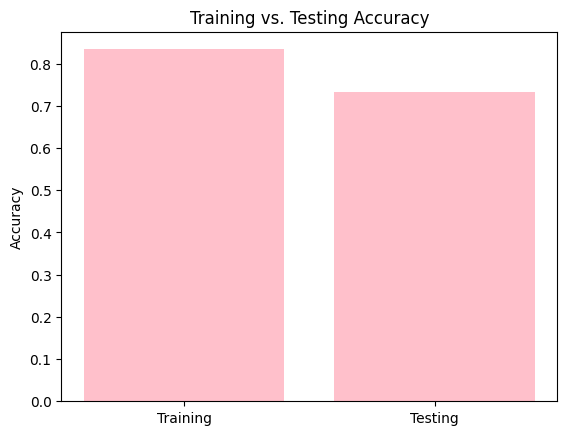

In [ ]:
# Plotting
plt.bar(['Training', 'Testing'], [train_accuracy1, test_accuracy1],color="pink")
plt.ylabel('Accuracy')
plt.title('Training vs. Testing Accuracy')
plt.show()

In [ ]:
svm_model_poly = SVC(kernel='poly', degree=3, random_state=42)  # Using polynomial kernel of degree 3
svm_model_poly.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_poly = svm_model_poly.predict(X_test)

# Calculate accuracy for the polynomial kernel model
accuracy_poly = accuracy_score(y_test, y_pred_poly)

# Print accuracy for the polynomial kernel model
print("Accuracy (Polynomial Kernel):", accuracy_poly)

Accuracy (Polynomial Kernel): 0.7467532467532467


In [ ]:
accuracy_poly = accuracy_score(y_test, y_pred_poly)
precision_poly = precision_score(y_test, y_pred_poly)
recall_poly = recall_score(y_test, y_pred_poly)
f1_poly = f1_score(y_test, y_pred_poly)
conf_matrix_poly = confusion_matrix(y_test, y_pred_poly)

# Print the evaluation metrics for the SVM model with poly kernel
print("Accuracy (poly):", accuracy_poly)
print("Precision (poly):", precision_poly)
print("Recall (poly):", recall_poly)
print("F1 Score (poly):", f1_poly)
print("Confusion Matrix (poly):\n", conf_matrix_poly)

Accuracy (poly): 0.7467532467532467
Precision (poly): 0.7222222222222222
Recall (poly): 0.4727272727272727
F1 Score (poly): 0.5714285714285714
Confusion Matrix (poly):
 [[89 10]
 [29 26]]


In [ ]:
svm_model_sigmoid = SVC(kernel='sigmoid', random_state=42)  # Using sigmoid kernel
svm_model_sigmoid.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_sigmoid = svm_model_sigmoid.predict(X_test)

# Calculate evaluation metrics
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
precision_sigmoid = precision_score(y_test, y_pred_sigmoid)
recall_sigmoid = recall_score(y_test, y_pred_sigmoid)
f1_sigmoid = f1_score(y_test, y_pred_sigmoid)
conf_matrix_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)

# Print evaluation metrics for the sigmoid kernel model
print("Accuracy (Sigmoid Kernel):", accuracy_sigmoid)
print("Precision (Sigmoid Kernel):", precision_sigmoid)
print("Recall (Sigmoid Kernel):", recall_sigmoid)
print("F1 Score (Sigmoid Kernel):", f1_sigmoid)
print("Confusion Matrix (Sigmoid Kernel):\n", conf_matrix_sigmoid)

Accuracy (Sigmoid Kernel): 0.6428571428571429
Precision (Sigmoid Kernel): 0.5
Recall (Sigmoid Kernel): 0.5272727272727272
F1 Score (Sigmoid Kernel): 0.5132743362831858
Confusion Matrix (Sigmoid Kernel):
 [[70 29]
 [26 29]]


|              | Linear SVM | RBF SVM    | Poly SVM   | Sigmoid SVM |
|--------------|------------|------------|------------|-------------|
| Accuracy     | 0.7597     | 0.7338     | 0.7468     | 0.6429      |
| Precision    | 0.6667     | 0.6458     | 0.7222     | 0.5000      |
| Recall       | 0.6545     | 0.5636     | 0.4727     | 0.5273      |
| F1 Score     | 0.6606     | 0.6019     | 0.5714     | 0.5133      |
| Confusion Matrix | [[81, 18], [19, 36]] | [[82, 17], [24, 31]] | [[89, 10], [29, 26]] | [[70, 29], [26, 29]] |


**Conclusion: In this experiment I have performed Support Vector Machine algorithm on diabetics dataset on different SVM kernels and compared it , and from comparsion for binary classiffication accuracy of Linear SVM is the highest among the RBF ,POLY,Sigmoid and i have refereed technical papers on SVM from ieee website below are the links**

* https://ieeexplore.ieee.org/document/9297411:
* https://sci-hub.se/10.1109/ICECA49313.2020.9297411
* https://sci-hub.se/10.1109/RoEduNet51892.2020.9324855
* https://ieeexplore.ieee.org/document/9324855
* https://ieeexplore.ieee.org/document/9853055
* https://ieeexplore.ieee.org/document/9760989